**Link for downloading dataset** : https://archive.ics.uci.edu/dataset/174/parkinsons

## Attribute Information:
**Matrix column entries (attributes):**

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude

**NHR, HNR** - Two measures of the ratio of noise to tonal components in the voice

**status** - The health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE, D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

**spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation

# Importing the Dependencies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import joblib
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Collection

In [4]:
# Loading the data from CSV file to pandas dataframe
file_path = '/kaggle/input/parkinson/parkinsons.CSV'

df= pd.read_csv(file_path)

# Data Preprocessing

* Dropping Redudant Columns
* Checking For Duplicated Rows
* Checking For Missing Values

In [5]:
# Printing first five rows of the data
print(df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [6]:
# Printing last five rows of the data
print(df.tail())

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA 

In [7]:
#printing the number of rows and columns
print("number of features in the Dataset:",df.shape[1])
print("number of instances in the Dataset:",df.shape[0])

number of features in the Dataset: 24
number of instances in the Dataset: 195


In [8]:
#printing the names of the columns
print(df.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


**the name column is useless so it will be dropped**

In [9]:
# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)

In [10]:
#recheking the number of rows and columns
print("number of features in the Dataset:",df.shape[1])
print("number of instances in the Dataset:",df.shape[0])

number of features in the Dataset: 23
number of instances in the Dataset: 195


In [11]:
#getting info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [12]:
#Obtaining Statistical Information About the Dataset
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [14]:
# Checking For Missing Values In Dataset
print(df.isna().sum())

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [15]:
df.groupby("status").mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


**lower frequencies, higher jitter and shimmer, and reduced HNR can serve as indicators for distinguishing individuals with Parkinson's disease from healthy individuals.**

# Data Visualization

In [16]:
# Count the occurrences of each category in the 'status' column
status_counts = df['status'].value_counts()
print(status_counts)

status
1    147
0     48
Name: count, dtype: int64


# 0---> healthy
# 1---> not healthy 

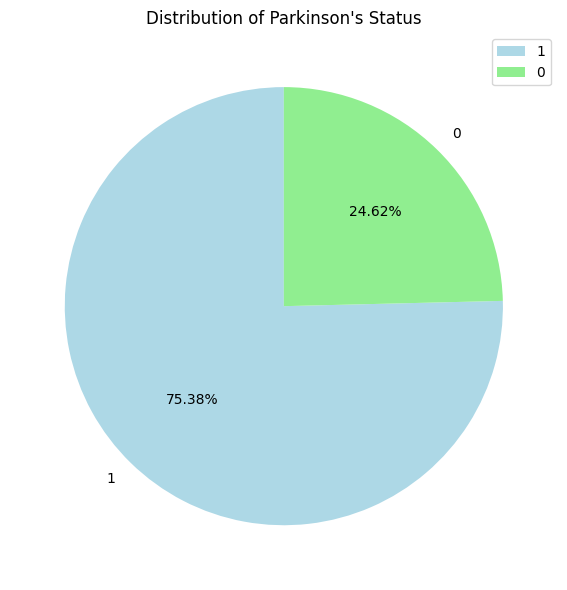

In [17]:
# Creating a pie plot
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Parkinson\'s Status')
plt.tight_layout()
plt.legend()
plt.show()

**Observations:**
- 75.38% peoples (i.e. 147 peoples out of 195 peoples) are those who have parkinson disease. While 24.62% peoples (i.e. 48 peoples out of 195 peoples) are those who don't have parkinsons disease
- **Data seems imbalanced**

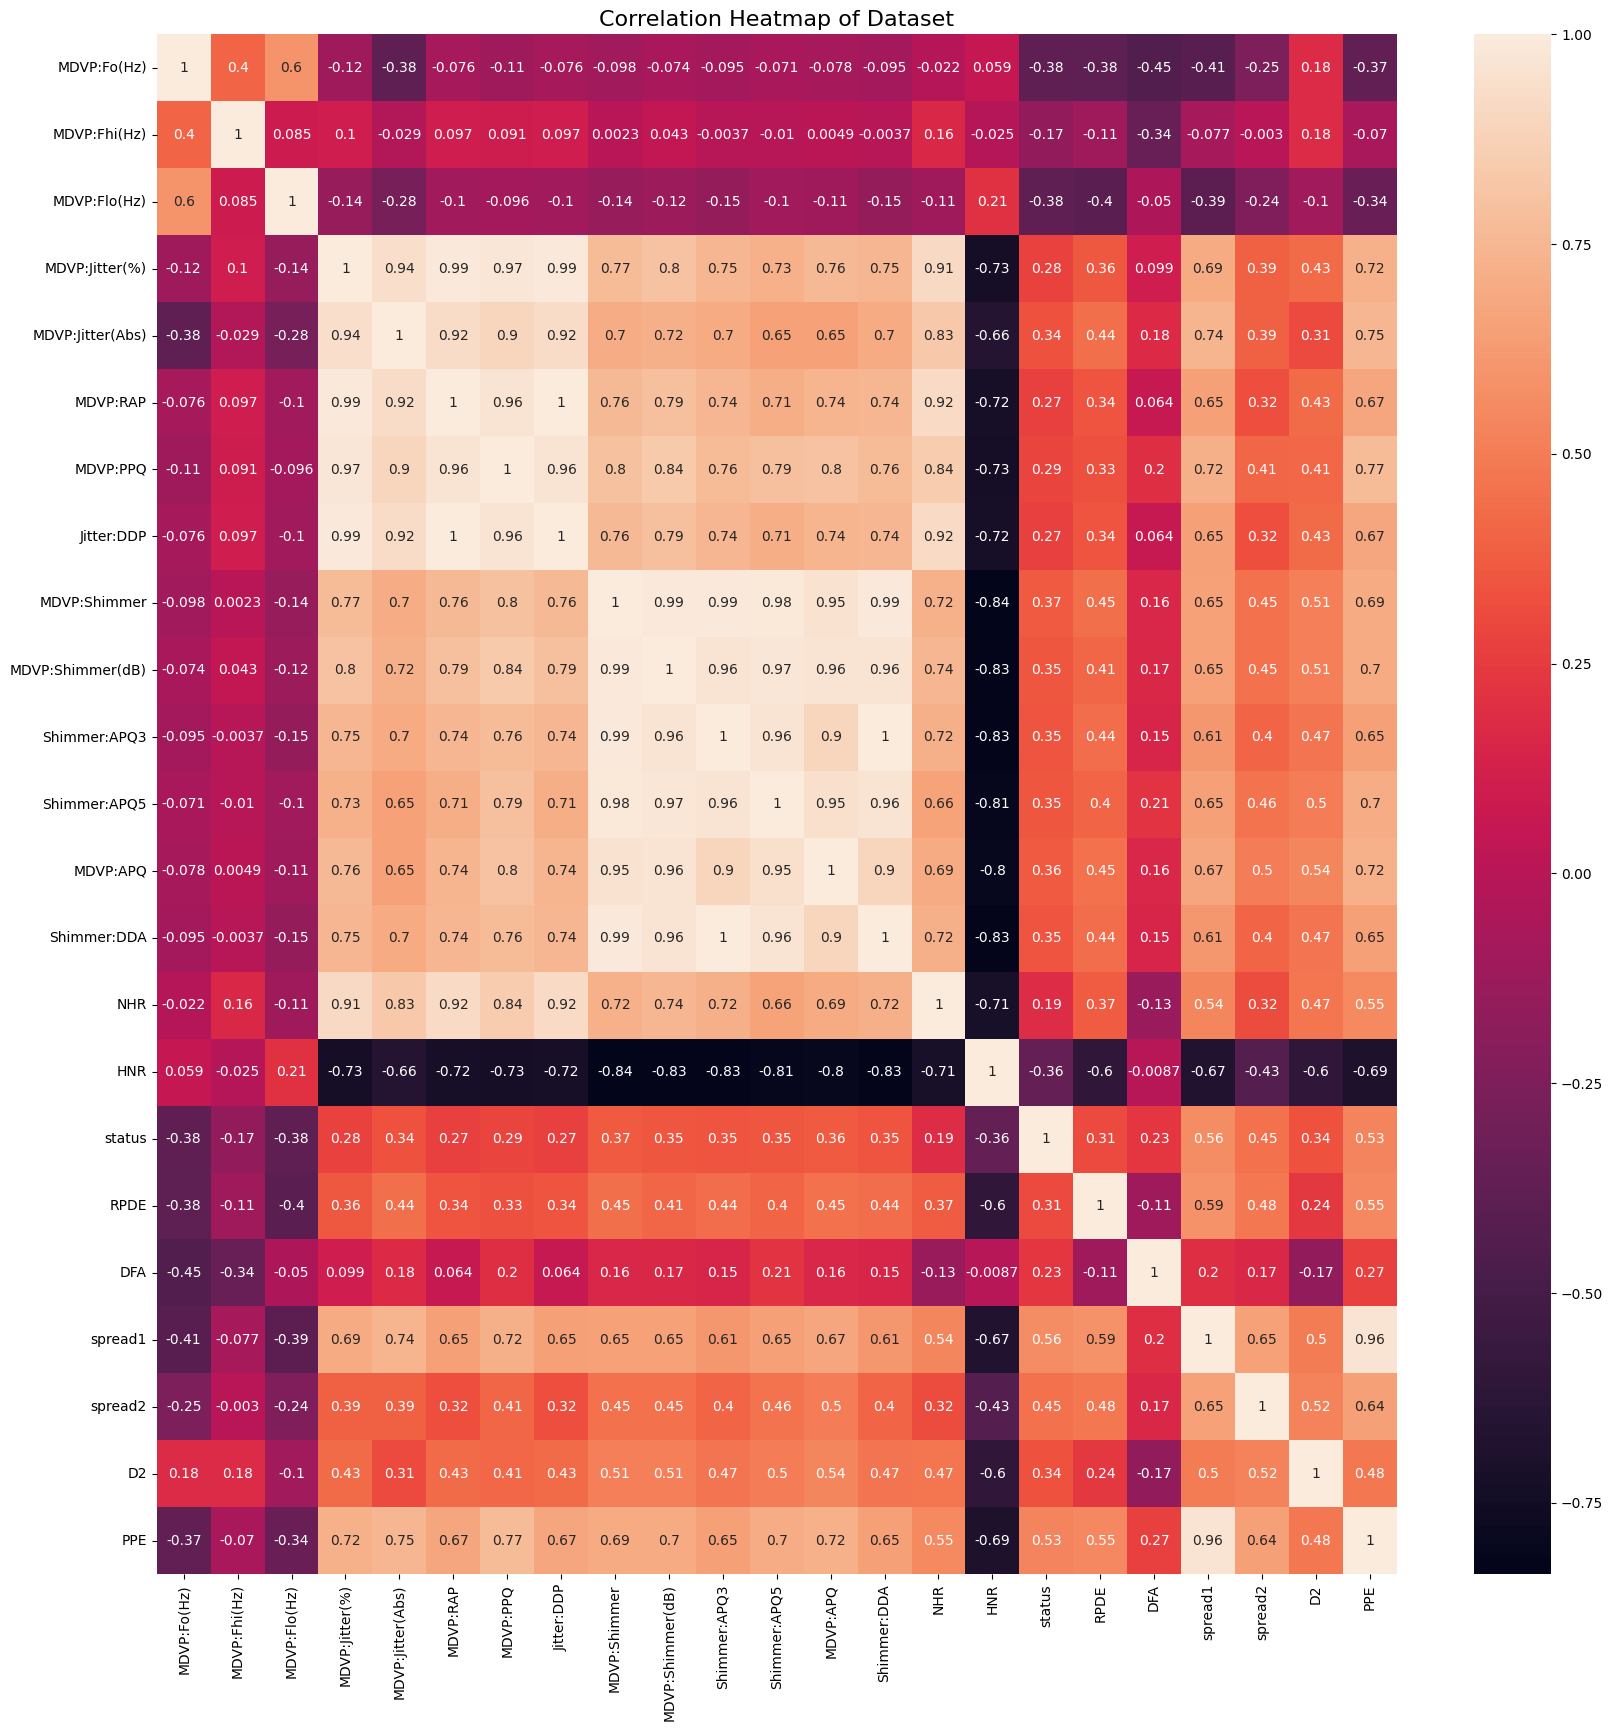

In [18]:
# Creating the heatmap
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True,ax=ax)
ax.set_title('Correlation Heatmap of Dataset', fontsize=16)
plt.show()

# For a better visualization let's see below

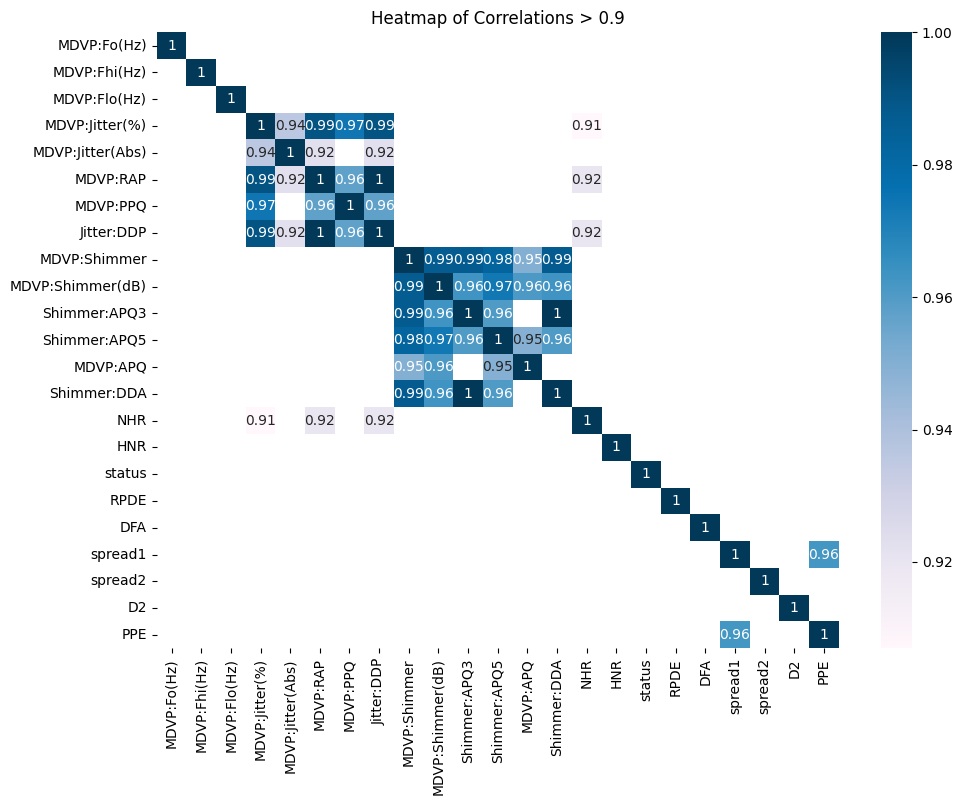

In [19]:
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr()[(df.corr()>0.9)],annot=True,cmap='PuBu')
plt.title('Heatmap of Correlations > 0.9')
plt.show()

**In this correlation heatmap, we can see that many features are highly correlated with eachother.**

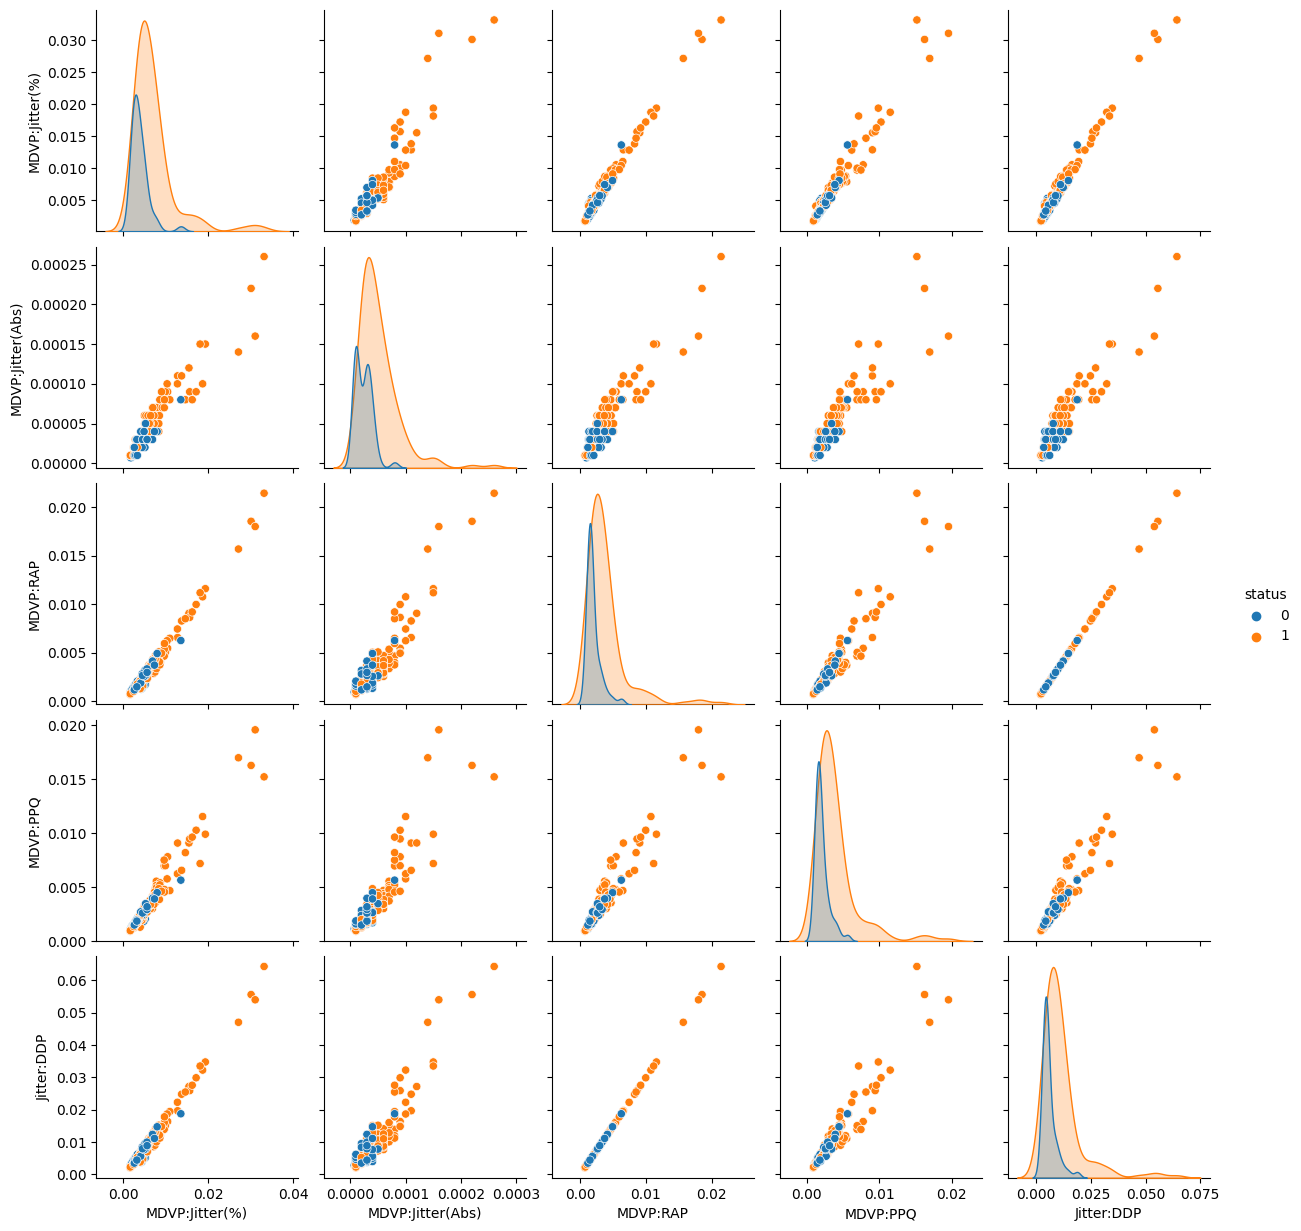

In [20]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

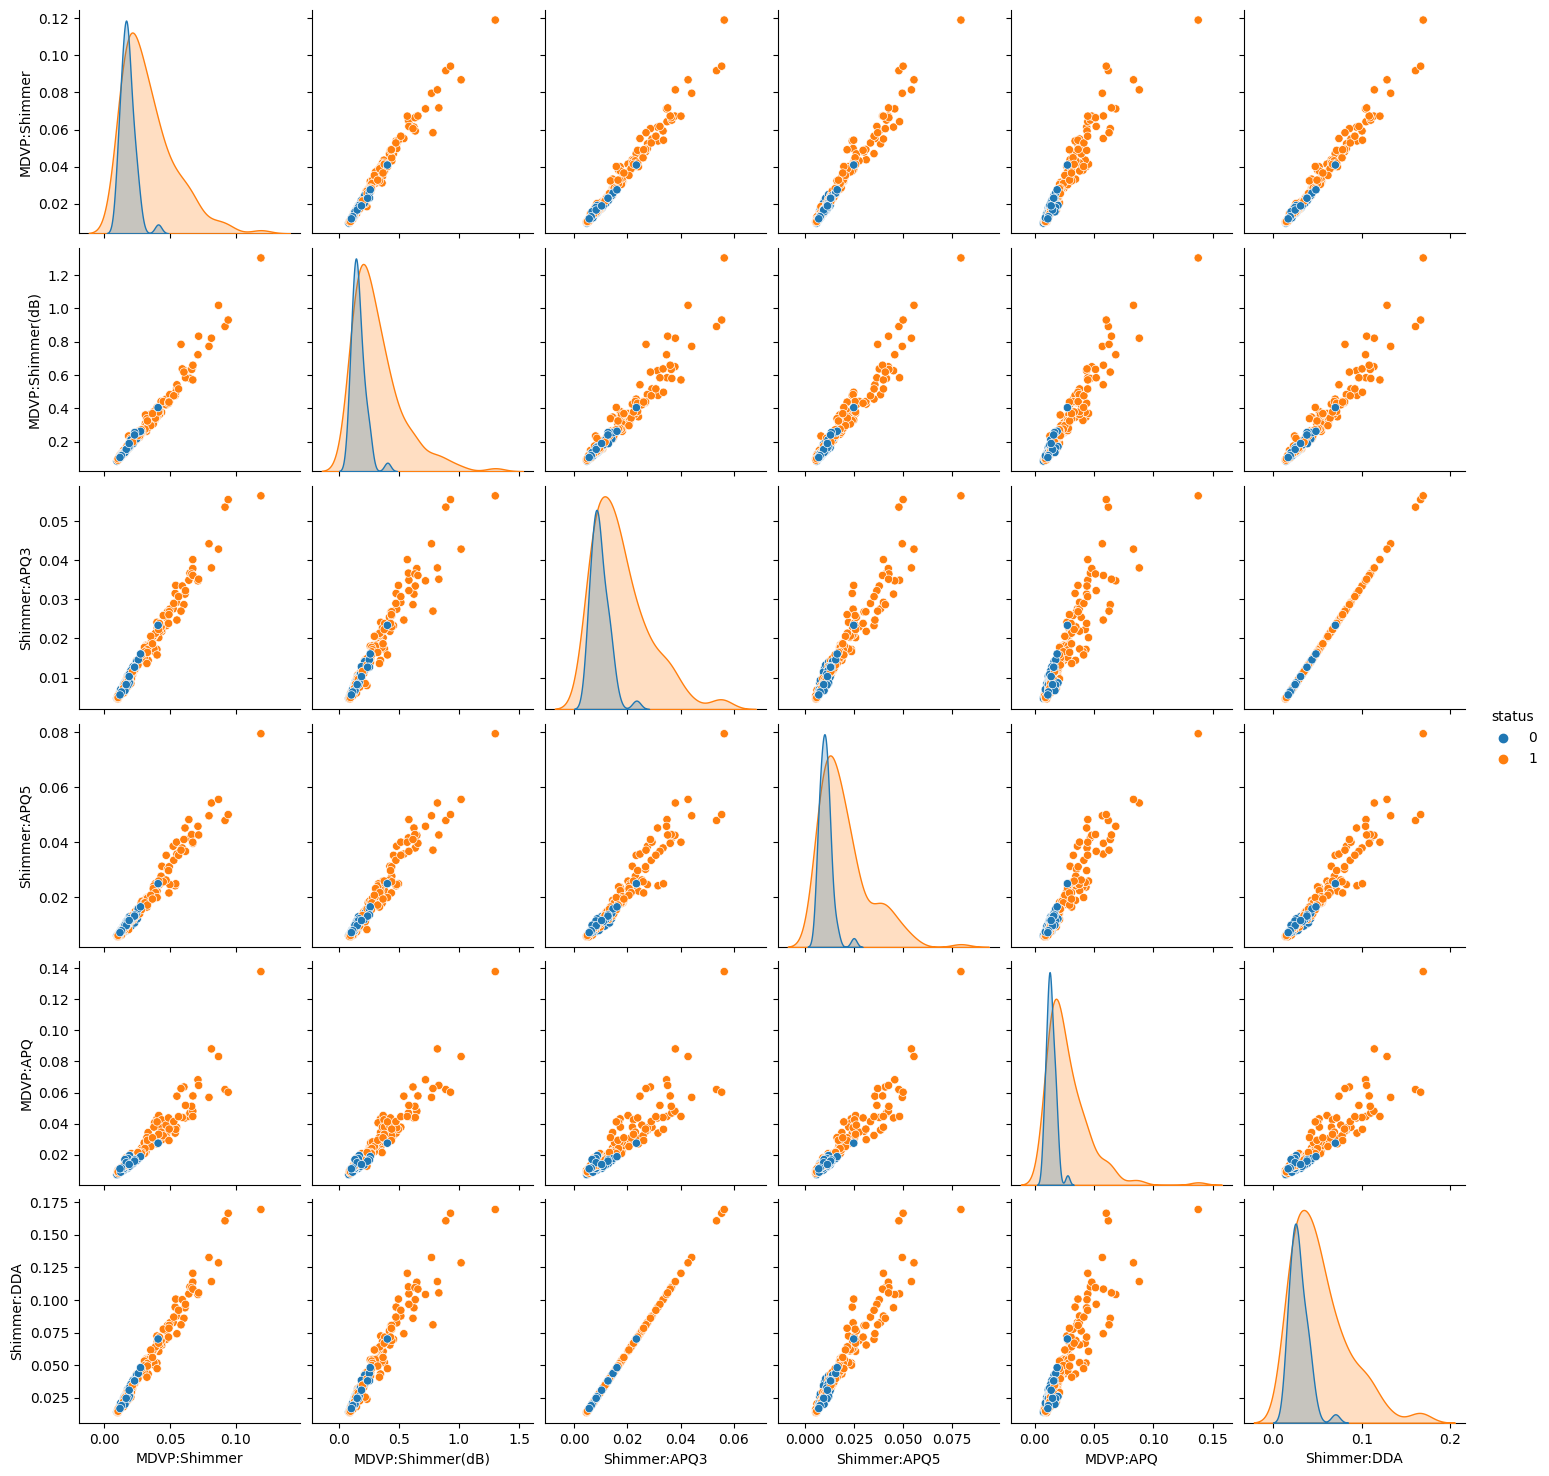

In [21]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

**The pair plot above indicates that all these measures of amplitude variation are highly correlated with each other**

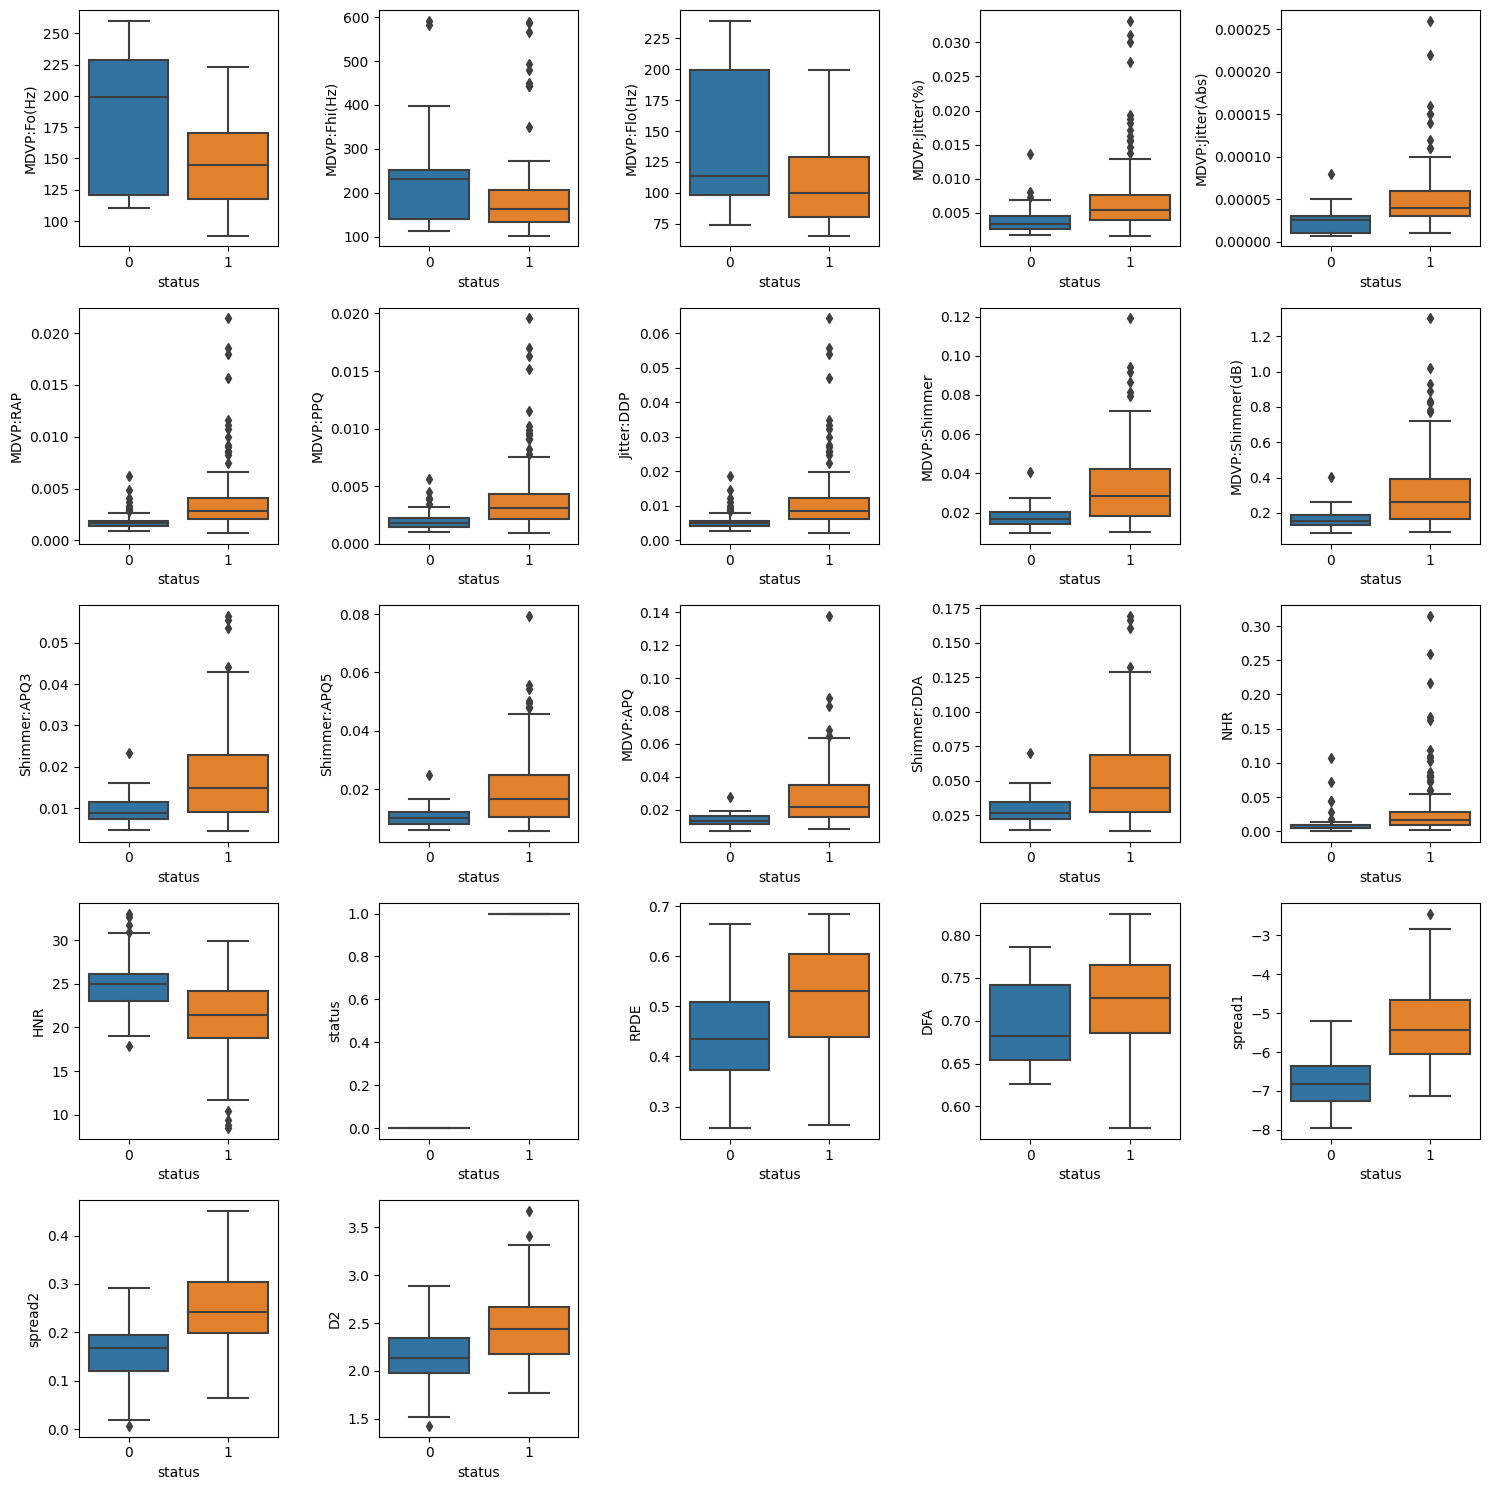

In [22]:
# Box Plot for each feature 
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

# Looping over all columns 
for i, column in enumerate(df.columns[:-1]): 
    sns.boxplot(x='status', y=column, data=df, orient='v', ax=axes[i])

# Removing any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**From the boxplot shown above it's evident that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)',then he/she is affected by parkinsons disease**

# Balancing Dataset

In [23]:
# Count the occurrences of each category in the 'status' column
status_counts = df['status'].value_counts()
print(status_counts)

status
1    147
0     48
Name: count, dtype: int64


In [24]:
# Separating the features (X) and the target (y)
X = df.drop(columns='status')
y = df['status'] 

In [25]:
print('Feature Shape Before Balancing :', X.shape)
print('Target Shape Before Balancing :', y.shape)

Feature Shape Before Balancing : (195, 22)
Target Shape Before Balancing : (195,)


In [26]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)

In [27]:
# Resampling The  Data
X, y = sm.fit_resample(X, y)

In [28]:
print('Feature Shape After Balancing :', X.shape)
print('Target Shape After Balancing :', y.shape)

Feature Shape After Balancing : (294, 22)
Target Shape After Balancing : (294,)


In [29]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler((-1,1))

In [30]:
# Apply the scaler to X (features only)
X_features = scaler.fit_transform(X)
y_labels =y

In [31]:
# splitting the dataset into traning and testing sets 
X_train , X_test , y_train , y_test = train_test_split(X_features, y_labels , test_size=0.2, random_state=20)

In [32]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (235, 22)
X_test shape : (59, 22)
y_train shape : (235,)
y_test shape : (59,)


# ML Model Training

# Logistic Regression

In [33]:
#initializing the logistic regression model
lrmodel = LogisticRegression()

In [34]:
lrmodel.fit(X_train, y_train)
y_test_predlr = lrmodel.predict(X_test)

In [35]:
#classification report
print(classification_report(y_test, y_test_predlr))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.90      0.69      0.78        26

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.82        59
weighted avg       0.84      0.83      0.83        59



In [36]:
y_train_predlr = lrmodel.predict(X_train)

In [37]:
# Calculating accuracy scores
train_accuracy = accuracy_score(y_train, y_train_predlr)
test_accuracy = accuracy_score(y_test, y_test_predlr)

# Printing the accuracy scores
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.85
Test Accuracy: 0.83


### Confusion matrix of Logistic regression model

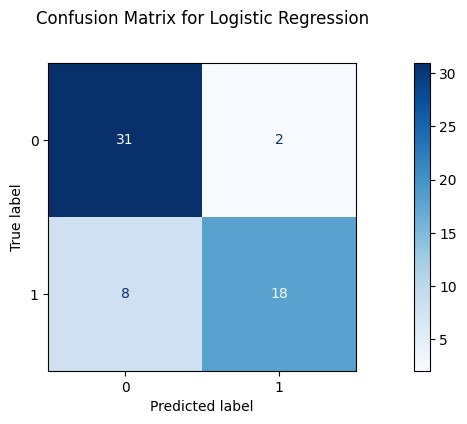

In [38]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_test_predlr)

# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lrmodel.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.show()

**True Negatives (TN): 31**

**False Positives (FP): 2**

**False Negatives (FN): 8**

**True Positives (TP): 18**

### AUC of Logistic regression model

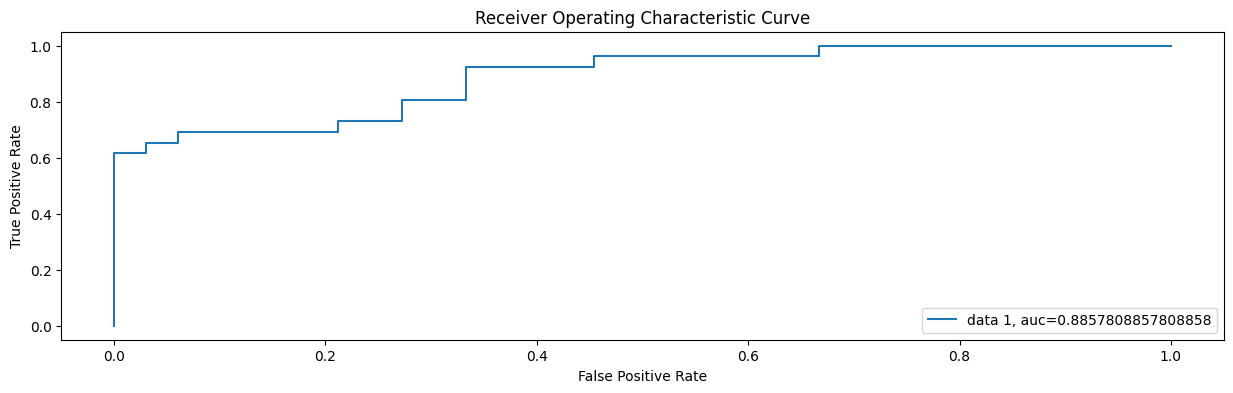

In [39]:
y_pred_proba = lrmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

**An AUC of 0.8857.. indicates that logistic regression model is  a robust and reliable model that is well-suited for distinguishing between the classes in the dataset**

In [40]:
# Dumping Logistic Regression Model
joblib.dump(lrmodel, 'lrmodel.pkl')

['lrmodel.pkl']

# DecisionTreeClassifier

In [41]:
#initializing the DecisionTreeClassifier model
DTmodel=DecisionTreeClassifier()

In [42]:
DTmodel.fit(X_train , y_train)
y_test_predDT = DTmodel.predict(X_test)

In [43]:
# classification report
print(classification_report(y_test, y_test_predDT))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.86      0.96      0.91        26

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



In [44]:
y_train_predDT = DTmodel.predict(X_train)

In [45]:
# Calculating accuracy scores
train_accuracy = accuracy_score(y_train, y_train_predDT)
test_accuracy = accuracy_score(y_test, y_test_predDT)

# Printing the accuracy scores
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.92


# Confusion Matrix for DecisionTreeClassifier

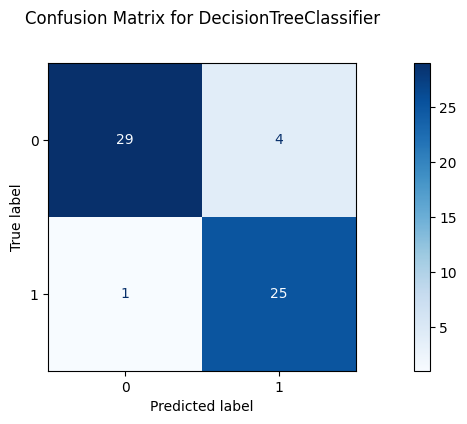

In [46]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_test_predDT)

# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTmodel.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for DecisionTreeClassifier', y=1.1)
plt.show()

# AUC of DecisionTreeClassifier

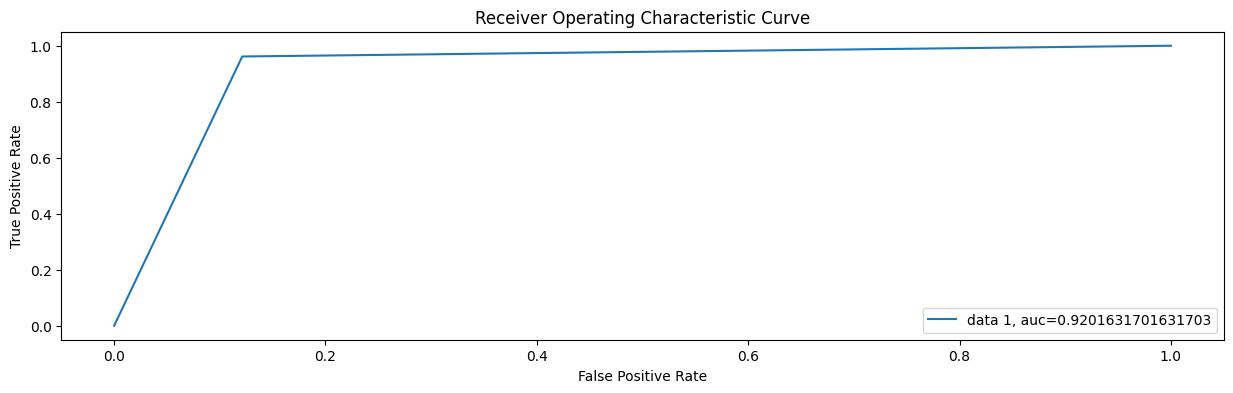

In [47]:
y_pred_proba = DTmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

# Hyperparameter tuning of a Decision Tree Classifier

In [48]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=DTmodel, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [49]:
print("Best Parameters:", CV_dt.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'random_state': 120}


In [50]:
DTmodel2=DecisionTreeClassifier(random_state=120, max_features='auto', max_depth=6, criterion='entropy')
DTmodel2.fit(X_train, y_train)
predDT = DTmodel2.predict(X_test) 
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



# Confusion Matrix for DecisionTreeClassifier after Hyperparameter tuning

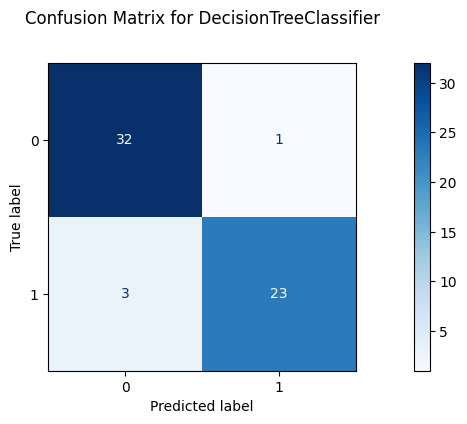

In [51]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predDT)

# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTmodel2.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for DecisionTreeClassifier', y=1.1)
plt.show()

# AUC of DecisionTreeClassifier after Hyperparameter tuning

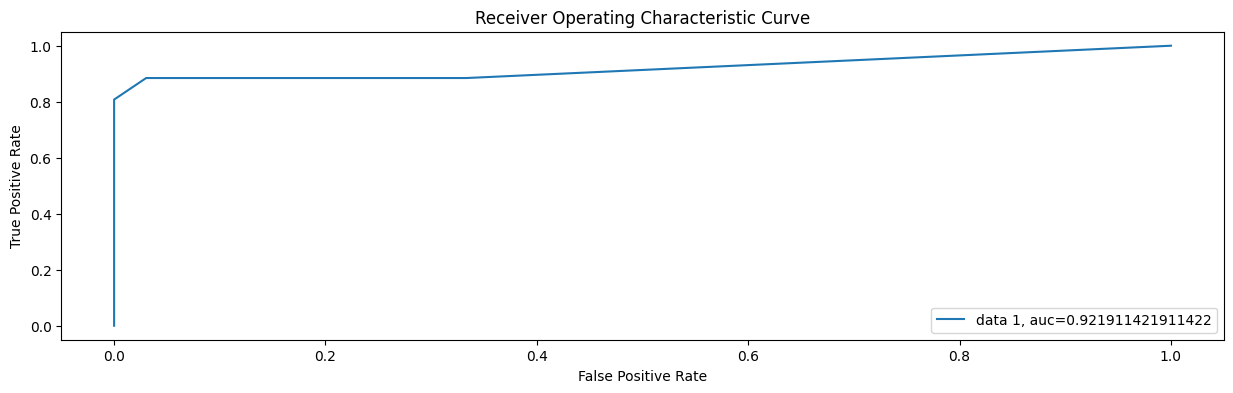

In [52]:
y_pred_proba = DTmodel2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

In [53]:
# Dumping Decision Tree Classifier
joblib.dump(DTmodel2, 'DTmodel2.pkl')

['DTmodel2.pkl']

# SVM ( support vector machine)

In [54]:
#Create a svm Classifier
SVmodel=svm.SVC(kernel='linear',probability=True)

In [55]:
SVmodel.fit(X_train,y_train)
y_test_predSV = SVmodel.predict(X_test)

In [56]:
# classification report
print(classification_report(y_test, y_test_predSV))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        33
           1       0.94      0.62      0.74        26

    accuracy                           0.81        59
   macro avg       0.85      0.79      0.80        59
weighted avg       0.84      0.81      0.81        59



In [57]:
y_train_predSV = SVmodel.predict(X_train)

In [58]:
# Calculating accuracy scores
train_accuracy = accuracy_score(y_train, y_train_predSV)
test_accuracy = accuracy_score(y_test, y_test_predSV)

# Printing the accuracy scores
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.86
Test Accuracy: 0.81


# Hyperparameter tuning of a SVM

In [59]:
# Creating a pipeline with scaling and the SVM model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', svm.SVC(probability=True)) 
])

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10]  # Gamma for RBF kernel
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fitting the model on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto', 0.1, 1, 10],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [60]:
# Getting the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [61]:
# Make predictions using the best model
SVmodel2 = grid_search.best_estimator_
y_test_pred = SVmodel2.predict(X_test)

# Print classification report for test data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        26

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



In [62]:
# Make predictions 
y_train_pred = SVmodel2.predict(X_train) 

# Calculating accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the accuracy scores
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.97


# Confusion Matrix for SVM Model

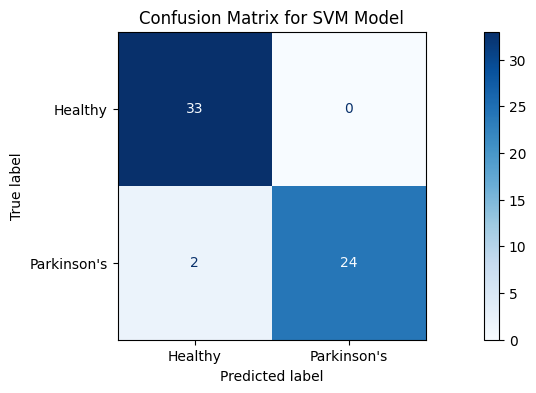

In [63]:
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(cm, display_labels=["Healthy", "Parkinson's"]).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Model')
plt.show()

# AUC of SVM after Hyperparameter tuning

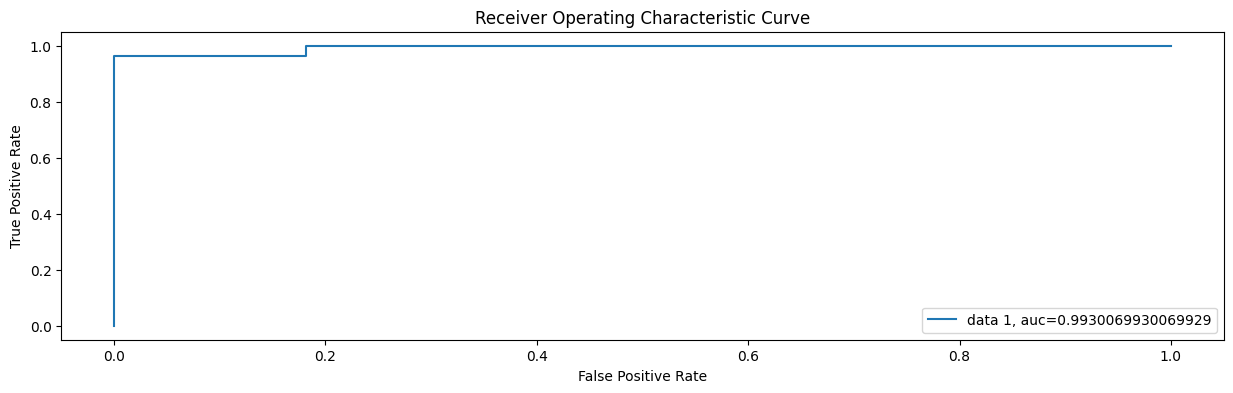

In [64]:
y_pred_proba = SVmodel2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

In [65]:
# Dumping SVM Classifier
joblib.dump(SVmodel2, 'SVmodel2.pkl')

['SVmodel2.pkl']

# KNN Classifier

In [66]:
Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, y_pred))  
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.9491525423728814, 0.9661016949152542, 0.9661016949152542, 0.9661016949152542, 0.9152542372881356, 0.9152542372881356, 0.8983050847457628, 0.9152542372881356]


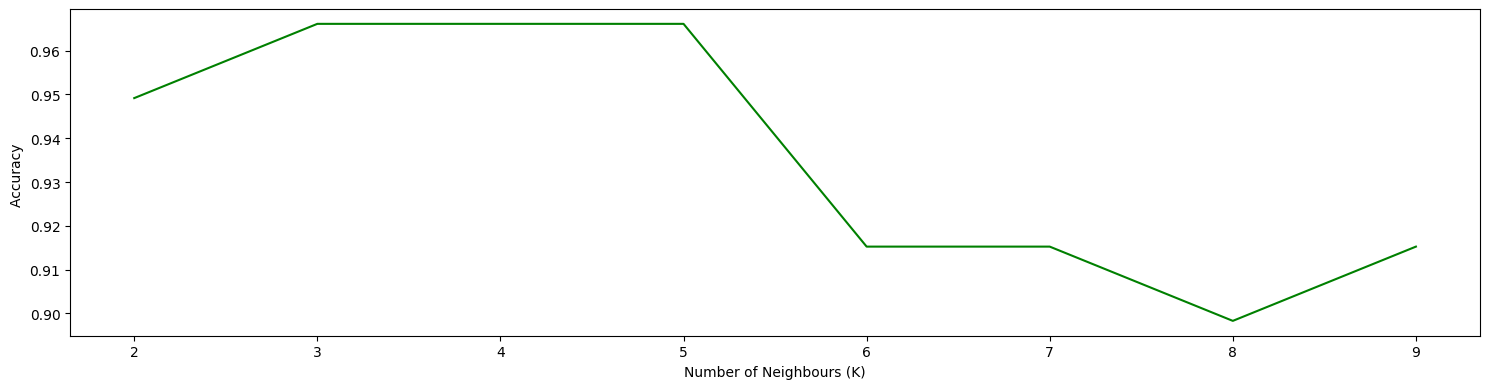

In [67]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

**The optimal number of neighbors falls between 3 and 5. However, since the default number of neighbors for predictions is already 5, we can simply omit specifying any value in the parentheses**

In [68]:
#initializing a KNN model
knn_model=KNeighborsClassifier()

In [69]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_test_predknn =knn_model.predict(X_test)
y_train_predknn=knn_model.predict(X_train)

In [71]:
print(classification_report(y_test, y_test_predknn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        26

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



In [72]:
# Calculating accuracy scores
train_accuracy = accuracy_score(y_train, y_train_predknn)
test_accuracy = accuracy_score(y_test, y_test_predknn)

# Printing the accuracy scores
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.95
Test Accuracy: 0.97


# Confusion Matrix for KNeighborsClassifier

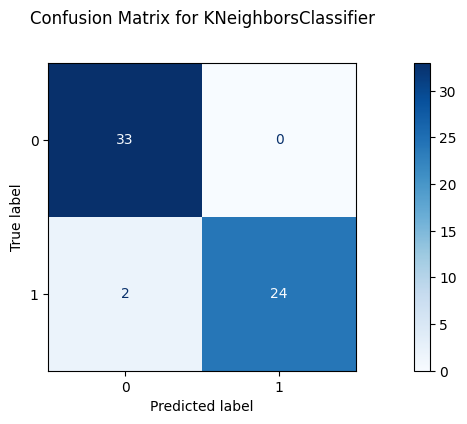

In [73]:
# Calculating the confusion matrix for KNN
cm = confusion_matrix(y_test, y_test_predknn)

# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNeighborsClassifier', y=1.1)
plt.show()

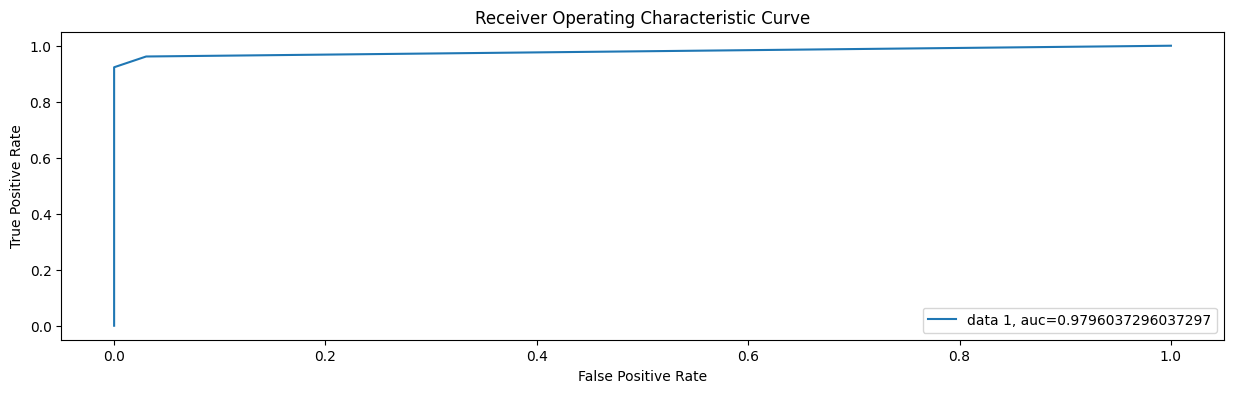

In [74]:
y_pred_proba = knn_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

In [75]:
# Dumping KNN Classifier
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

# Random Forest Classifier

In [76]:
#initializing a Random Forest Classifier model
rf_model=RandomForestClassifier()

In [77]:
rf_model.fit(X_train , y_train)

RandomForestClassifier()

In [78]:
y_test_predrf=rf_model.predict(X_test)
y_train_predrf=rf_model.predict(X_train)

In [79]:
print(classification_report(y_test, y_test_predrf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.95      0.81      0.88        26

    accuracy                           0.90        59
   macro avg       0.91      0.89      0.89        59
weighted avg       0.90      0.90      0.90        59



In [80]:
# Calculating accuracy scores
training_accuracy=accuracy_score(y_train , y_train_predlr)
test_accuracy=accuracy_score(y_test , y_test_predlr)

# Plotting accuracy scores
print("training accuracy: ",training_accuracy)
print("test accuracy: ",test_accuracy)

training accuracy:  0.851063829787234
test accuracy:  0.8305084745762712


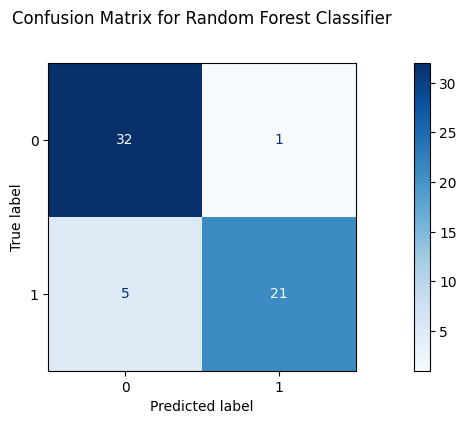

In [81]:
# Calculating the confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test, y_test_predrf)

# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier', y=1.1)
plt.show()

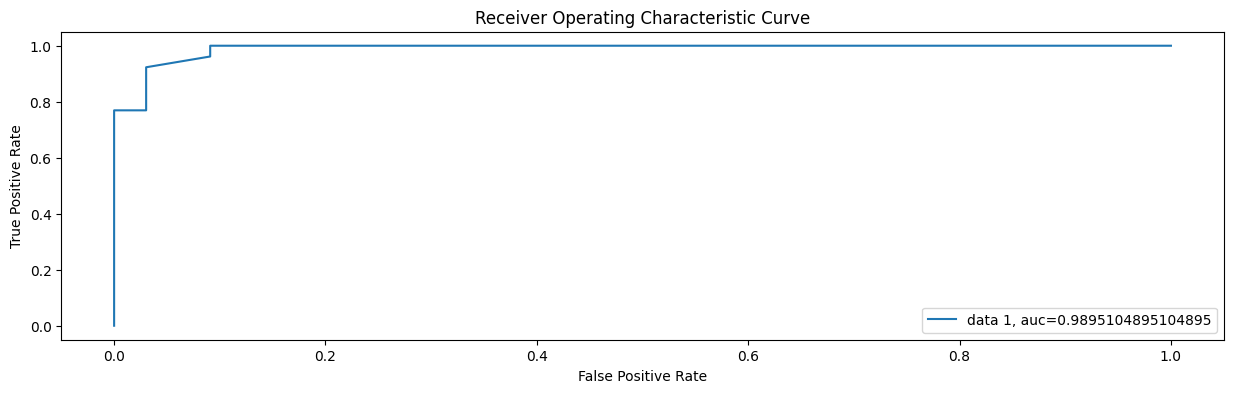

In [82]:
y_pred_proba = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

In [83]:
# Dumping Random Forest Classifier
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

# XGBoost Classifer

In [84]:
# Defining Parameter Dictionary
param_dict = {'max_depth': range(4,8), 'eta' : [0.1, 0.2, 0.3, 0.4, 0.5],
              'reg_lambda' : [0.8, 0.9, 1, 1.1, 1.2],
              'random_state': [300, 600, 900]}

In [85]:
XGB = GridSearchCV(XGBClassifier(), param_grid = param_dict,
                   scoring = 'f1', cv = 3, verbose = 1)
XGB.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(4, 8),
                         'random_state': [300, 600, 900],
                         'reg_lambda': [0.8, 0.9, 1, 1.1, 1.2]},
             scoring='f1', verbose=1)

In [86]:
print('Best Score :', XGB.best_score_)
print('Best Parameters :', XGB.best_params_)

Best Score : 0.954492328287509
Best Parameters : {'eta': 0.4, 'max_depth': 4, 'random_state': 300, 'reg_lambda': 1.2}


In [87]:
# Extracting Best Classifier From GridSearchCV
XGB_model= XGB.best_estimator_

In [88]:
XGB_model.fit(X_train , y_train)
y_test_predx=XGB_model.predict(X_test)
y_train_predx=XGB_model.predict(X_train)

In [89]:
training_accuracy=accuracy_score(y_train , y_train_predx)
test_accuracy=accuracy_score(y_test , y_test_predx)

print("training accuracy: ",training_accuracy)
print("test accuracy: ",test_accuracy)

training accuracy:  1.0
test accuracy:  0.9322033898305084


In [90]:
print(classification_report(y_test, y_test_predx))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.89      0.96      0.93        26

    accuracy                           0.93        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.93      0.93      0.93        59



# Confusion Matrix for XGBoost

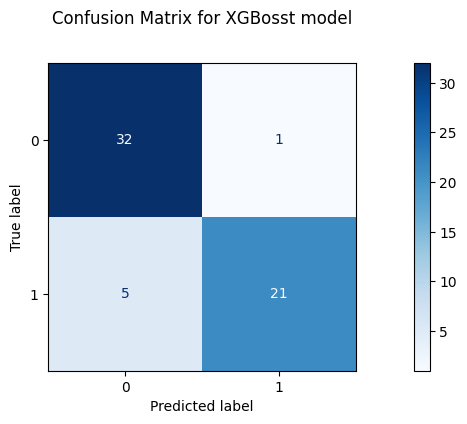

In [91]:
# Calculating the confusion matrix for XGB
cm = confusion_matrix(y_test, y_test_predrf)

# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB_model.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBosst model', y=1.1)
plt.show()

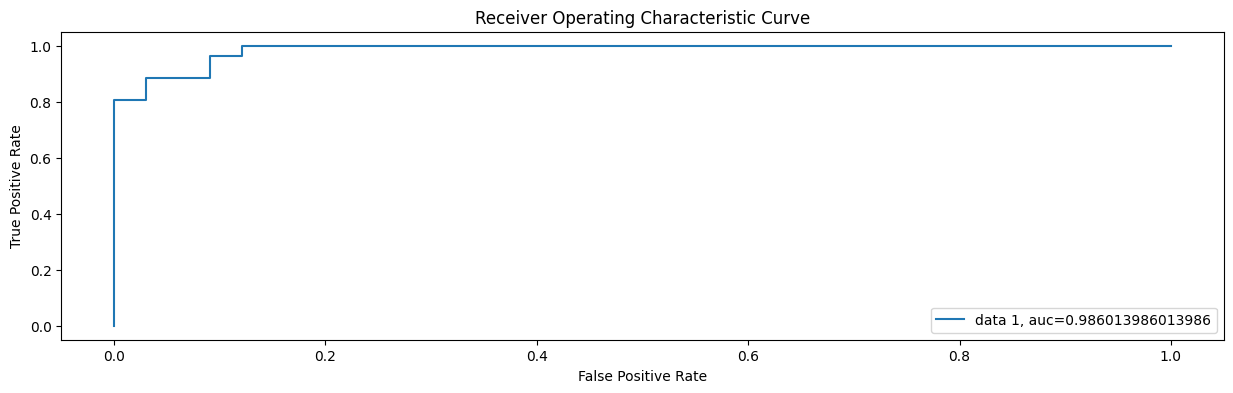

In [92]:
y_pred_proba = XGB_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

In [93]:
# Dumping XGBoost Classifier
joblib.dump(XGB_model, 'XGB_model.pkl')

['XGB_model.pkl']

# Naive Bayes model

In [94]:
# initializing a Naive Bayes model
nb_model=GaussianNB()

In [95]:
nb_model.fit(X_train , y_train)

GaussianNB()

In [96]:
y_test_prednb=nb_model.predict(X_test)
y_train_prednb=nb_model.predict(X_train)

In [97]:
training_accuracy=accuracy_score(y_train , y_train_prednb)
test_accuracy=accuracy_score(y_test , y_test_prednb)

print("training accuracy: ",training_accuracy)
print("test accuracy: ",test_accuracy)

training accuracy:  0.7787234042553192
test accuracy:  0.7627118644067796


In [98]:
print(classification_report(y_test, y_test_prednb))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        33
           1       0.93      0.50      0.65        26

    accuracy                           0.76        59
   macro avg       0.82      0.73      0.74        59
weighted avg       0.81      0.76      0.75        59



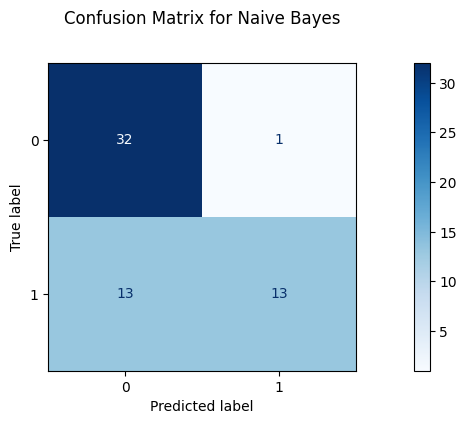

In [99]:
# Calculating the confusion matrix for Naive Bayes 
cm = confusion_matrix(y_test, y_test_prednb)

# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes', y=1.1)
plt.show()

**Naive Bayes is not a good model**

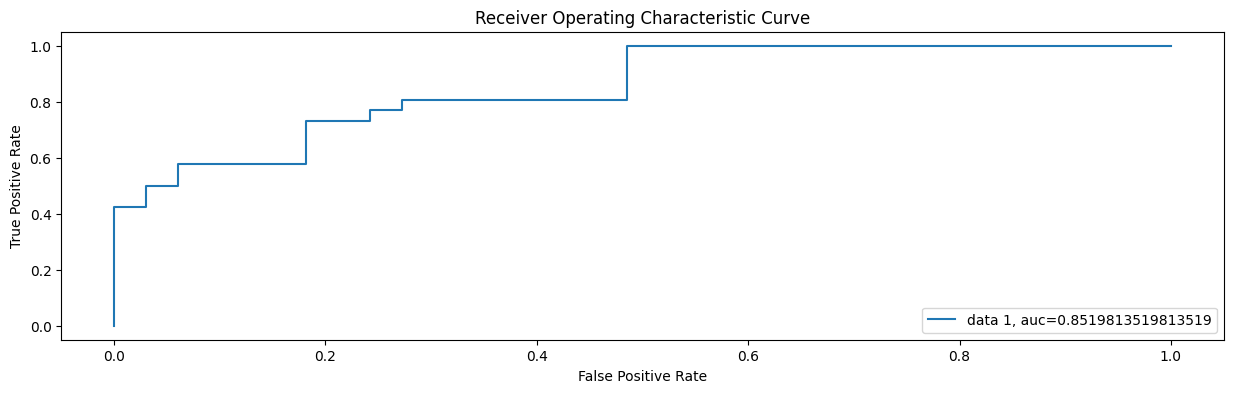

In [100]:
y_pred_proba = nb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

In [101]:
# Define parameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Initialize the model and GridSearchCV
gnb = GaussianNB()
NB = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')
NB.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", NB.best_params_)

Best Parameters: {'var_smoothing': 1e-09}


In [102]:
nb_model2 = GaussianNB(var_smoothing=1e-09)
nb_model2.fit(X_train, y_train)
y_pred_test = nb_model2.predict(X_test)

In [103]:
y_pred_train = nb_model2.predict(X_train)

In [104]:
training_accuracy=accuracy_score(y_train , y_pred_train)
test_accuracy=accuracy_score(y_test , y_pred_test)

print("training accuracy: ",training_accuracy)
print("test accuracy: ",test_accuracy)

training accuracy:  0.7787234042553192
test accuracy:  0.7627118644067796


In [105]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        33
           1       0.93      0.50      0.65        26

    accuracy                           0.76        59
   macro avg       0.82      0.73      0.74        59
weighted avg       0.81      0.76      0.75        59



**nothing changed !**

In [106]:
# Dumping Naive Bayes Classifier
joblib.dump(nb_model2, 'nb_model.pkl')

['nb_model.pkl']

# Comparison table

In [108]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Dictionary of models 
models = {
    "Decision Tree": DTmodel2,  
    "Random Forest": rf_model, 
    "Logistic Regression": lrmodel,  
    "SVM": SVmodel2,  
    "Naive Bayes": nb_model2,  
    "KNN": knn_model, 
    "XGBoost": XGB_model  
}

# Training and evaluating each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Displaying results for each model
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy       AUC  Precision    Recall  F1 Score
0        Decision Tree  0.932203  0.921911   0.958333  0.884615  0.920000
1        Random Forest  0.932203  0.987179   0.958333  0.884615  0.920000
2  Logistic Regression  0.830508  0.885781   0.900000  0.692308  0.782609
3                  SVM  0.966102  0.993007   1.000000  0.923077  0.960000
4          Naive Bayes  0.762712  0.851981   0.928571  0.500000  0.650000
5                  KNN  0.966102  0.979604   1.000000  0.923077  0.960000
6              XGBoost  0.932203  0.986014   0.892857  0.961538  0.925926


# SVM performs best overall, with the highest scores in accuracy, precision, F1 ,and AUC while also having a strong Recall